In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 11

from scipy.optimize import curve_fit

import pandas as pd

In [4]:
n0 = 1.00029 # Weisstein Eric. Index of Refraction. Wolfram Research. 2005.

# Path to the files that we will be reading data from
fileArr = ['data/sapphire_disk_706nm.txt', 'data/sapphire_disk_852nm.txt', 'data/sapphire_disk_1014nm.txt']
wavelengthArr = [706, 852, 1014]

# The width of the sample in mm
d = 2.29 # for sapphire sample

In [15]:
# Functional form of the displacement as a function of angle,
# including extra parameters for phase and displacement offsets
# Theta should be in radians
def func_form(theta, a0, a1, a2):
    return a0 + d*np.sin(theta - a1)*(1 - (n0 * np.cos(theta - a1))/np.sqrt(a2**2 - n0**2 * np.sin(theta - a1)**2))

nArr = np.zeros(len(fileArr))

for i in range(len(fileArr)):
    # Read the data file
    data = pd.read_csv(fileArr[i])

    # Convert to radians and mm
    # There may or may not have to be a negative here, not quite sure why
    angleArr = -data["angle"] * np.pi / 180
    displacementArr = data["gauss_center"] * 1e-3 - np.mean(data["gauss_center"] * 1e-3)

    # In case you need to cut away some of the extreme data points because of issues
    # with centering/interference
    angleArr = angleArr[5:-5]
    displacementArr = displacementArr[5:-5]
    
    # Now actually do the curve fitting
    popt, pcov = curve_fit(func_form, angleArr, displacementArr,
                           #method='trf',
                           # Bounds for [displacement offset, phase offset, IoR]
                           bounds=([-6, -np.pi/2 + .01, 1.2], # Lower bound
                                   [6, np.pi/2 - .01, 1.9])) # Upper bound

    nArr[i] = popt[2]

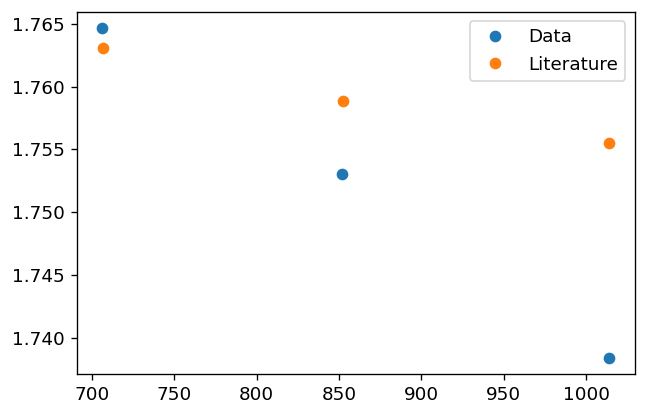

In [14]:
literatureNArr = [1.76303, 1.75885, 1.75547]
literatureWavelengthArr = [706.52, 852.11, 1013.98]

plt.plot(wavelengthArr, nArr, 'o', label='Data')
plt.plot(literatureWavelengthArr, literatureNArr, 'o', label='Literature')
plt.legend()
plt.show()